<h3><center>This Notebook contains Classification, Regression, Clustering, and Dimensionality Reduction algorithms applied using Scikit Learn</center></h3>
    
<h2><center><a href="#ref1">Classification</a></center></h2>
<h4><center>(Loan Default Prediction)</center></h4>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
  <li><a href="#ref2">Data Preparation</a></li>
  <li><a href="#ref3">Model Fitting and Evaluation
    <ul>
        <li><a href="#ref4">Logistic Regression</a></li>
        <li><a href="#ref5">Nearest Neighbors</a></li>
        <li><a href="#ref6">Random Forest</a></li>
        <li><a href="#ref7">Support Vector Machines</a></li>
        <li><a href="#ref8">Neural Networks</a></li>
        <li><a href="#ref9">Naive Bayes</a></li>
    </ul>
      </a>
  </li>
  <li><a href="#ref10">Model Comparison</a></li>  
  <li><a href="#ref11">Model Refinement (Random Forest Parameters Tuning)</a></li>
</ul>
   
</div>

<h2><center><a href="#ref12"> Regression </a></center></h2>
<h4><center>(Automobile Price Prediction)</center></h4>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
  <li><a href="#ref13">Data Preparation</a></li>
  <li><a href="#ref14">Model Fitting and Evaluation
    <ul>
        <li><a href="#ref15">Multiple Linear Regression</a></li>
        <li><a href="#ref16">Nearest Neighbors</a></li>
        <li><a href="#ref17">Polynomial Regression</a></li>    
        <li><a href="#ref18">Random Forest</a></li>    
        <li><a href="#ref19">Support Vector Regression</a></li>
        <li><a href="#ref20">Neural Networks</a></li>
    </ul>
      </a>
  </li>
  <li><a href="#ref21">Model Comparison</a></li>
  <li><a href="#ref22">Model Refinement (Neural Networks Parameters Tuning)</a></li>
</ul>
</div>

<h2><center><a href="#ref23"> Clustering </a></center></h2>
<h4><center>(Custome Segmentation and Weathor Stations Clustering)</center></h4>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  
<li><a href="#ref24">Classical Clustering (Customer Segmentation)</a></li>
<ul>
<li><a href="#ref25">Data Preparation</a></li>
<li><a href="#ref26">Clustering
    <ul>
        <li><a href="#ref27">Kmeans</a></li>
        <li><a href="#ref28">Hierarchical</a></li>
    </ul>
    </a>
</li>   
</ul>
<br>
<li><a href="#ref29">Density Based Clustering</a></li>
<ul>
<li><a href="#ref30">Data Preparation</a></li>
<li><a href="#ref31">DBSCAN</a>
</ul>

</div>

<h2><center><a href="#ref32"> Dimensionality Reduction </a></center></h2>
<h4><center>(Customer Segmentation)</center></h4>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#ref33">Data Preparation</a></li>
    <li><a href="#ref34">Dimensionality Reduction Methods</a>
    <ul>
        <li><a href="#ref35">Principle Component Analysis</a></li>
        <li><a href="#ref36">Linear Discriminant Analysis</a></li>
    </ul>
</ul>
</div> 

###### Importing the libraries

In [1]:
# Importing the libraries

# Analysis Libraries
import itertools
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D 
from pylab import rcParams
import pylab
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode (connected = True)

# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Classification and Regression Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score 

# Clustering and Dimensionality Reduction Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

mpl.style.use('ggplot')

<a id="ref1"></a>
<h1><center>Classification</center></h1>

<a id="ref2"></a>
<h3><center> Data Preparation </center></h3>

###### Training Data Analysis

Loading the loan data

In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Convert date to datetime object

In [3]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Total ouptut classes and their count

In [4]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Feature Engineering by understanding relationship between input vs output features

Understand relationship between input features (gender, principal) and the output (loan_status)

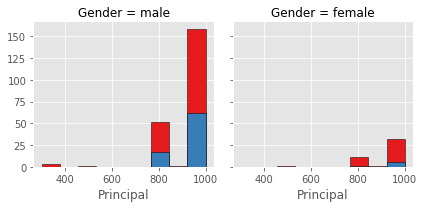

In [5]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
plt.show()

Understand relationship between input features (gender, age) and the output (loan_status)

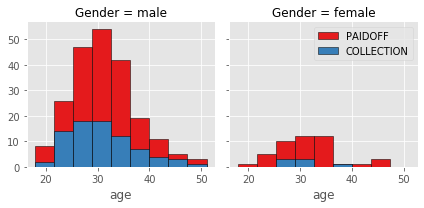

In [6]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Understand relationship between input features (gender, dayofweek) and the output (loan_status)

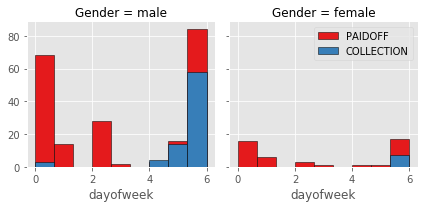

In [7]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [8]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


Lets look at gender:

In [9]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Lets convert male to 0 and female to 1:

In [10]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


Now, extract the important features from dataframe separately.

In [11]:
Features = df[['Principal','terms','age','Gender','weekend','education']]
Output = df['loan_status']

Features.head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college


Lets look at education before going forward:

In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

When education is **Master or Above** then in that case there is no information. in other words masters or above is useless for insight

Lets one hot encode the education column and then drop **masters or above** column

In [13]:
ohe = pd.get_dummies(df['education'])
ohe.head()

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Concatenate one hot encoded with features dataframe.

In [14]:
Features = pd.concat([Features,ohe.drop("Master or Above",axis=1)], axis=1)
Features.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,college
0,1000,30,45,0,0,High School or Below,0,1,0
1,1000,30,33,1,0,Bechalor,1,0,0
2,1000,15,27,0,0,college,0,0,1
3,1000,30,28,1,1,college,0,0,1
4,1000,30,29,0,1,college,0,0,1


As onehotencoding is added so let's delete education column

In [15]:
Features.drop("education",axis=1,inplace=True)
Features.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Scaling/normalizing the input features

In [16]:
X_train = Features.values
X_train = StandardScaler().fit(X_train).transform(X_train)
X_train[:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [17]:
y_train = Output.values
y_train[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

###### Test Data Preparation

In [18]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Feature Engineering as did for training data

In [19]:
df = test_df

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [20]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [21]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [22]:
Features = df[['Principal','terms','age','Gender','weekend']]
Features = pd.concat([Features,pd.get_dummies(df['education'])], axis=1)
Features.drop(['Master or Above'], axis = 1,inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [23]:
X_test = Features
X_test = StandardScaler().fit(X_test).transform(X_test)
X_test[:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [24]:
y_test = df['loan_status'].values
y_test[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

<a id="ref3"></a>
<h3><center>Model Fitting and Evaluation</center></h3> 

<a id="ref4"></a>
<h6><center>Logistic Regression</center></h6> 

Model definition and fitting

In [25]:
LR = LogisticRegression().fit(X_train, y_train)

Model Evaluation

In [26]:
LR_predictions = LR.predict(X_test)
print("The accuracy is: ", LR.score(X_test, y_test))
print("The f1_score is: ", f1_score(y_test, LR_predictions, average='weighted'))

The accuracy is:  0.7592592592592593
The f1_score is:  0.6717642373556352


printing classification report

In [27]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

    accuracy                           0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



calculating confusion matrix

In [28]:
np.set_printoptions(precision=2)
LR_cnf_matrix = confusion_matrix(y_test, LR_predictions, labels=["PAIDOFF","COLLECTION"])
LR_cnf_matrix

array([[40,  0],
       [13,  1]], dtype=int64)

<a id="ref5"></a>
<h6><center>Nearest Neighbors</center></h6> 

Model definition and fitting

In [29]:
KNN = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

Model Evaluation

In [30]:
KNN_predictions = KNN.predict(X_test)
print("The accuracy is: ", KNN.score(X_test, y_test))
print("The f1_score is: ", f1_score(y_test, KNN_predictions, average='weighted'))

The accuracy is:  0.7407407407407407
The f1_score is:  0.7253086419753088


printing classification report

In [31]:
print(classification_report(y_test, KNN_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.36      0.42        14
     PAIDOFF       0.80      0.88      0.83        40

    accuracy                           0.74        54
   macro avg       0.65      0.62      0.62        54
weighted avg       0.72      0.74      0.73        54



calculating confusion matrix

In [32]:
np.set_printoptions(precision=2)
KNN_cnf_matrix = confusion_matrix(y_test, KNN_predictions, labels=["PAIDOFF","COLLECTION"])
KNN_cnf_matrix

array([[35,  5],
       [ 9,  5]], dtype=int64)

<a id="ref6"></a>
<h6><center>Random Forest Classification</center></h6> 

Model definition and fitting

In [33]:
RF = RandomForestClassifier(n_estimators = 500,random_state=42).fit(X_train,y_train)

Model Evaluation

In [34]:
RF_predictions = RF.predict(X_test)
print("The accuracy is: ", RF.score(X_test, y_test))
print("The f1_score is: ", f1_score(y_test, RF_predictions, average='weighted'))

The accuracy is:  0.7222222222222222
The f1_score is:  0.7105756358768406


printing classification report

In [35]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.45      0.36      0.40        14
     PAIDOFF       0.79      0.85      0.82        40

    accuracy                           0.72        54
   macro avg       0.62      0.60      0.61        54
weighted avg       0.70      0.72      0.71        54



calculating confusion matrix

In [36]:
np.set_printoptions(precision=2)
RF_cnf_matrix = confusion_matrix(y_test, RF_predictions, labels=["PAIDOFF","COLLECTION"])
RF_cnf_matrix

array([[34,  6],
       [ 9,  5]], dtype=int64)

<a id="ref7"></a>
<h6><center>Support Vector Machines</center></h6> 

Model definition and fitting

In [37]:
svm = SVC(kernel="poly").fit(X_train,y_train)

Model Evaluation

In [38]:
svm_predictions = svm.predict(X_test)
print("The accuracy is: ", svm.score(X_test, y_test))
print("The f1_score is: ", f1_score(y_test, svm_predictions, average='weighted'))

The accuracy is:  0.7407407407407407
The f1_score is:  0.683127572016461


printing classification report

In [39]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.14      0.22        14
     PAIDOFF       0.76      0.95      0.84        40

    accuracy                           0.74        54
   macro avg       0.63      0.55      0.53        54
weighted avg       0.69      0.74      0.68        54



calculating confusion matrix

In [40]:
np.set_printoptions(precision=2)
svm_cnf_matrix = confusion_matrix(y_test, svm_predictions, labels=["PAIDOFF","COLLECTION"])
svm_cnf_matrix

array([[38,  2],
       [12,  2]], dtype=int64)

<a id="ref8"></a>
<h6><center>Neural Network Classification</center></h6> 

Model definition and fitting

In [41]:
nn_class = MLPClassifier((256,128),max_iter=1500).fit(X_train, y_train)

Model Evaluation

In [42]:
nn_predictions = nn_class.predict(X_test)
print("The accuracy is: ", nn_class.score(X_test, y_test))
print("The f1_score is: ", f1_score(y_test, nn_predictions, average='weighted'))

The accuracy is:  0.7222222222222222
The f1_score is:  0.7105756358768406


printing classification report

In [43]:
print(classification_report(y_test, nn_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.45      0.36      0.40        14
     PAIDOFF       0.79      0.85      0.82        40

    accuracy                           0.72        54
   macro avg       0.62      0.60      0.61        54
weighted avg       0.70      0.72      0.71        54



calculating confusion matrix

In [44]:
np.set_printoptions(precision=2)
nn_cnf_matrix = confusion_matrix(y_test, nn_predictions, labels=["PAIDOFF","COLLECTION"])
nn_cnf_matrix

array([[34,  6],
       [ 9,  5]], dtype=int64)

<a id="ref9"></a>
<h6><center>Naive Bayes Classification</center></h6> 

Model definition and fitting

In [45]:
NB = GaussianNB().fit(X_train, y_train)

Model Evaluation

In [46]:
NB_predictions = NB.predict(X_test)
print("The accuracy is: ", NB.score(X_test, y_test))
print("The f1_score is: ", f1_score(y_test, NB_predictions, average='weighted'))

The accuracy is:  0.6851851851851852
The f1_score is:  0.703520421830281


printing classification report

In [47]:
print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.43      0.71      0.54        14
     PAIDOFF       0.87      0.68      0.76        40

    accuracy                           0.69        54
   macro avg       0.65      0.69      0.65        54
weighted avg       0.76      0.69      0.70        54



calculating confusion matrix

In [48]:
np.set_printoptions(precision=2)
NB_cnf_matrix = confusion_matrix(y_test, NB_predictions, labels=["PAIDOFF","COLLECTION"])
NB_cnf_matrix

array([[27, 13],
       [ 4, 10]], dtype=int64)

<a id="ref10"></a>
<h3><center>Model Comparison</center></h3> 

Plotting Confusion Matrix Function (Classification Evaluation)

In [49]:
def plot_ConfusionMatrix(fig, ax, cm, cmap, tick_marks, classes, title):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    fig.colorbar(im, orientation="vertical", pad=0.2,ax=ax)

plotting confusion matrix for each model

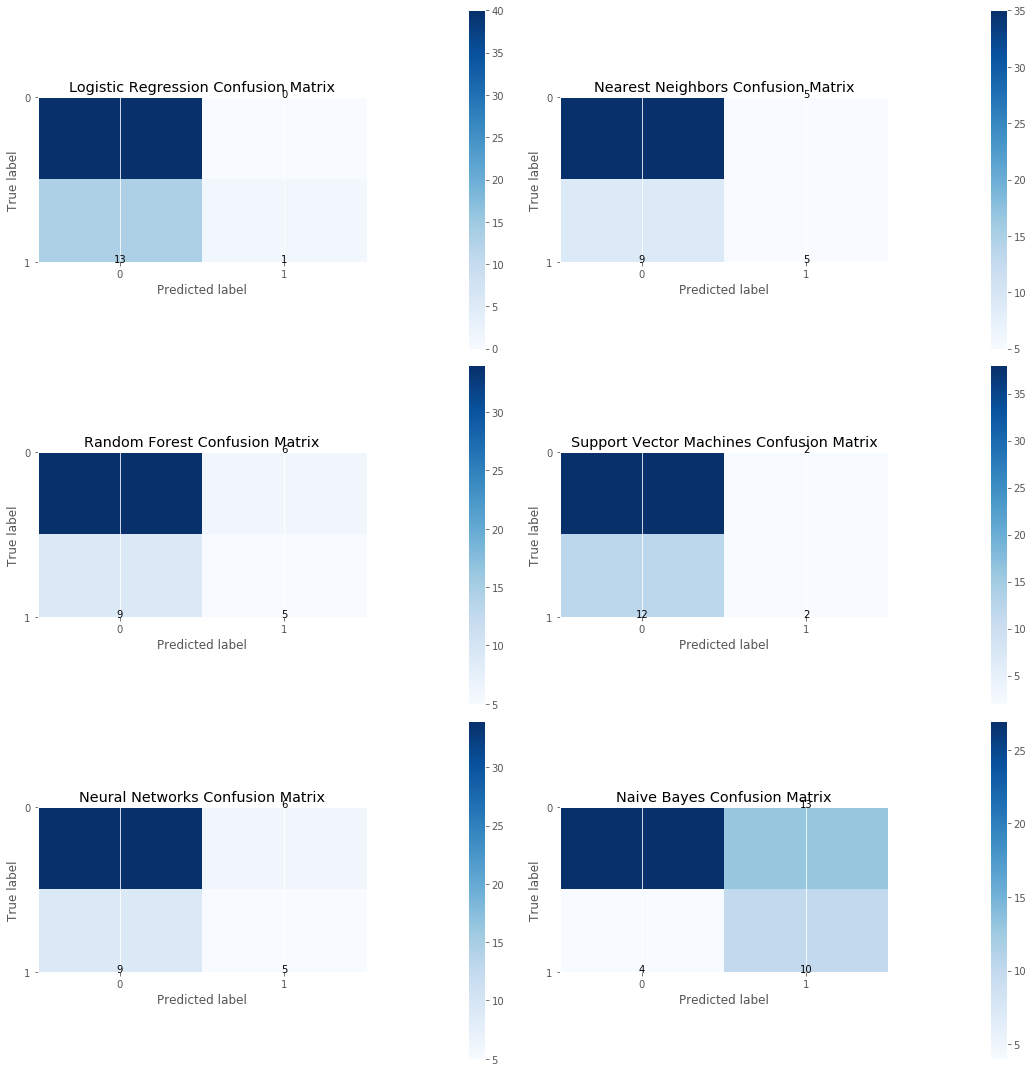

In [50]:
classes=["PAIDOFF","COLLECTION"]
cmap=plt.cm.Blues
tick_marks = np.arange(len(classes))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(15,15))

title = "Logistic Regression Confusion Matrix"
cm = LR_cnf_matrix
plot_ConfusionMatrix(fig, ax1, cm, cmap, tick_marks, classes, title)

title = "Nearest Neighbors Confusion Matrix"
cm = KNN_cnf_matrix
plot_ConfusionMatrix(fig, ax2, cm, cmap, tick_marks, classes, title)

title = "Random Forest Confusion Matrix"
cm = RF_cnf_matrix
plot_ConfusionMatrix(fig, ax3, cm, cmap, tick_marks, classes, title)

title = "Support Vector Machines Confusion Matrix"
cm = svm_cnf_matrix
plot_ConfusionMatrix(fig, ax4, cm, cmap, tick_marks, classes, title)

title = "Neural Networks Confusion Matrix"
cm = nn_cnf_matrix
plot_ConfusionMatrix(fig, ax5, cm, cmap, tick_marks, classes, title)

title = "Naive Bayes Confusion Matrix"
cm = NB_cnf_matrix
plot_ConfusionMatrix(fig, ax6, cm, cmap, tick_marks, classes, title)

plt.tight_layout()
plt.show()

Class 0 is "Paid off" and class 1 is "collection".<br>
In all of the models it seems that paid off is classified correctly however collection is misclassified except for naive bayes model which did better on collection class than others.<br>
The reason could be less training data for collection class.<br>
To improve the model performance multiple models could be combined intelligenctly and bias class learning methodology should be developed which is out of this scope. <br>
This will be done in next project specific to classification.

summarize fi_score

In [51]:
F1_score = [f1_score(y_test, LR_predictions, average='weighted'),
            f1_score(y_test, KNN_predictions, average='weighted'),
            f1_score(y_test, RF_predictions, average='weighted'),
            f1_score(y_test, svm_predictions, average='weighted'),
            f1_score(y_test, nn_predictions, average='weighted'),
            f1_score(y_test, NB_predictions, average='weighted')]

In [52]:
df = {'Algorithm': ['Logistic Regression','K-Nearest Neighbors', 'Random Forest', 'Support Vector Machines', 
                    'Neural Network', 'Naive Bayes'], \
      'F1-score': F1_score}
df_final = pd.DataFrame(data=df, columns=['Algorithm', 'F1-score'], index=None)
df_final

,Algorithm,F1-score
0,Logistic Regression,0.671764
1,K-Nearest Neighbors,0.725309
2,Random Forest,0.710576
3,Support Vector Machines,0.683128
4,Neural Network,0.710576
5,Naive Bayes,0.703520


<a id="ref11"></a>
<h3><center>Model Refinement</center></h3> 
<center>(Random Forest Parameters Tuning</center>

To refine any model, its hyper parameters tuning is done in grid search manner.

Creating Grid of hyperparameter values for random forest model

In [53]:
# Number of trees in random forest
n_estimators = [100,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [None,10, 20]
# Minimum number of samples required to split a node
min_samples_split = [2, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]

# Create the grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Giving grid of values as parameter along with random forest model instance and number of cross validations

In [54]:
Rf_grid = GridSearchCV(estimator = RF, param_grid = grid, cv = 3, n_jobs = -1, verbose = 2)

Fitting Random Forest models for all hyper parameters combinations

In [55]:
Rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   15.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

Best performing Random Forest model

In [56]:
BestRf = Rf_grid.best_estimator_
BestRf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Best Performing Random Forest model performance

In [57]:
BestRF_predictions = BestRf.predict(X_test)
print("After Refinement, the accuracy value is: ", BestRf.score(X_test,y_test))
print("After Refinement, the f1_score value is: ", f1_score(y_test, BestRF_predictions, average='weighted'))

After Refinement, the accuracy value is:  0.7222222222222222
After Refinement, the f1_score value is:  0.7105756358768406


<a id="ref12"></a>
<h1><center>Regression</center></h1>

<a id="ref13"></a>
<h3><center> Data Preparation </center></h3>
<center>(The data preprocessing part for Automobile data is already done in my **data analysis capstone project** which is also available at my github. https://github.com/Pythoner-Waqas/Portfolio_Projects)</center>

Loading the clean dataset saved after data wrangling part during my **data analysis capstone**.

In [58]:
df = pd.read_csv('Automobile_clean.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


We will develop different regression models using predictor variables identified as important in exploratory data analysis during my **Data Analysis Capstone.**

In [59]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',
        'bore', 'wheel-base', 'city-mpg', 'length', 'width', ]]

In [60]:
y = df['price']

Splitting the dataset into the Training set and Test set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<a id="ref14"></a>
<h3><center>Model Fitting and Evaluation</center></h3> 

<a id="ref15"></a>
<h6><center> Multiple Linear Regression </center></h6>

Model definition and fitting

In [62]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MLR Evaluation

In [63]:
print("The R_squared value for Multiple Linear Regression Model is: ", LR.score(X_test, y_test))

The R_squared value for Multiple Linear Regression Model is:  0.7526252480045136


There is also statsmodel module to do linear regression and its quite beautiful. lets see that also in action.

Multiple Linear Regression using statsmodel Ordinary Least Squares

Loading the dataset

In [64]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Encoding Categorical data

In [65]:
ohe = pd.get_dummies(dataset['State'])
dataset_new = pd.concat((dataset,ohe),axis=1).drop("State",axis=1)
dataset_new.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [66]:
X = dataset_new.drop("Profit",axis=1).values
y = dataset_new["Profit"].values

Adding for bias term

In [67]:
#X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

In [68]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        17:18:58   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x5          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x6          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<a id="ref16"></a>
<h6><center> Nearest Neighbor Regression </center></h6>

Model definition and fitting

In [69]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Model Evaluation

In [70]:
print("The R_squared value for Nearest Neighbor Regression Model is: ", KNN.score(X_test, y_test))

The R_squared value for Nearest Neighbor Regression Model is:  0.6533447260820286


<a id="ref17"></a>
<h6><center>Polynomial Regression</center></h6>

Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline.

In [71]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2,include_bias=False)),('model',LinearRegression())]

we input the list as an argument to the pipeline constructor

In [72]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can now normalize the data,  perform a transform and fit the model simultaneously. 

In [73]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Polynomial Regression Evaluation

In [74]:
print("The R_squared value for Polynomial Linear Regression Model is: ", pipe.score(X_test, y_test))

The R_squared value for Polynomial Linear Regression Model is:  0.7580179543978163


<a id="ref18"></a>
<h6><center>Random Forest Regression</center></h6>

Model definition and fitting

In [75]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(X_train,y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Random Forest Regression Evaluation

In [76]:
print("The R_squared value for Random Forest Regression Model is: ", RF.score(X_test, y_test))

The R_squared value for Random Forest Regression Model is:  0.9194070670942548


As a note, Random Forest Regression is also called stepwise regression.
Let's see that in action.

In [77]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [78]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

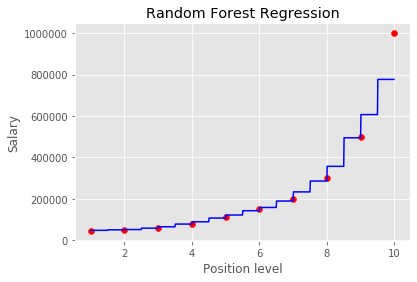

In [79]:
# Visualising the Random Forest Regression results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<a id="ref19"></a>
<h6><center>Support Vector Regression</center></h6>

Scaling train and test data

let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [80]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1,1))
X_test_scaled = sc_X.transform(X_test)
y_test_scaled = sc_y.transform(y_test.values.reshape(-1,1))

Model definition and fitting

In [81]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train_scaled,y_train_scaled.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Model Evaluation

In [82]:
print("The R_squared value is: ", svr.score(X_test_scaled, y_test_scaled))

The R_squared value is:  0.7964703676581911


<a id="ref20"></a>
<h6><center>Neural Networks Regression</center></h6>

Scaling train and test data

In [83]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1,1))
X_test_scaled = sc_X.transform(X_test)
y_test_scaled = sc_y.transform(y_test.values.reshape(-1,1))

Model definition and fitting

In [84]:
nn = MLPRegressor((128,64),max_iter=7000)
nn.fit(X_train_scaled,y_train_scaled.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128, 64), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=7000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Model Evaluation

In [85]:
print("The R_squared value for Model is: ", nn.score(X_test_scaled, y_test_scaled))

The R_squared value for Model is:  0.916659243977761


<a id="ref21"></a>
<h3><center> Model Comparison </center></h3>

Function for Plotting distributions (Regression Evaluation)

In [86]:
def plot_distribution(axes, predicted, actual, title):

    sns.distplot(actual, hist=False, color="r", label="Actual Values", ax=axes)
    sns.distplot(predicted, hist=False, color="b", label="predicted Values" , ax=axes)

    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    axes.set_title(title)
    axes.set_ylabel('Proportion of Cars')
    axes.set_xlabel('Price (in dollars)')

plotting distribution function for each model

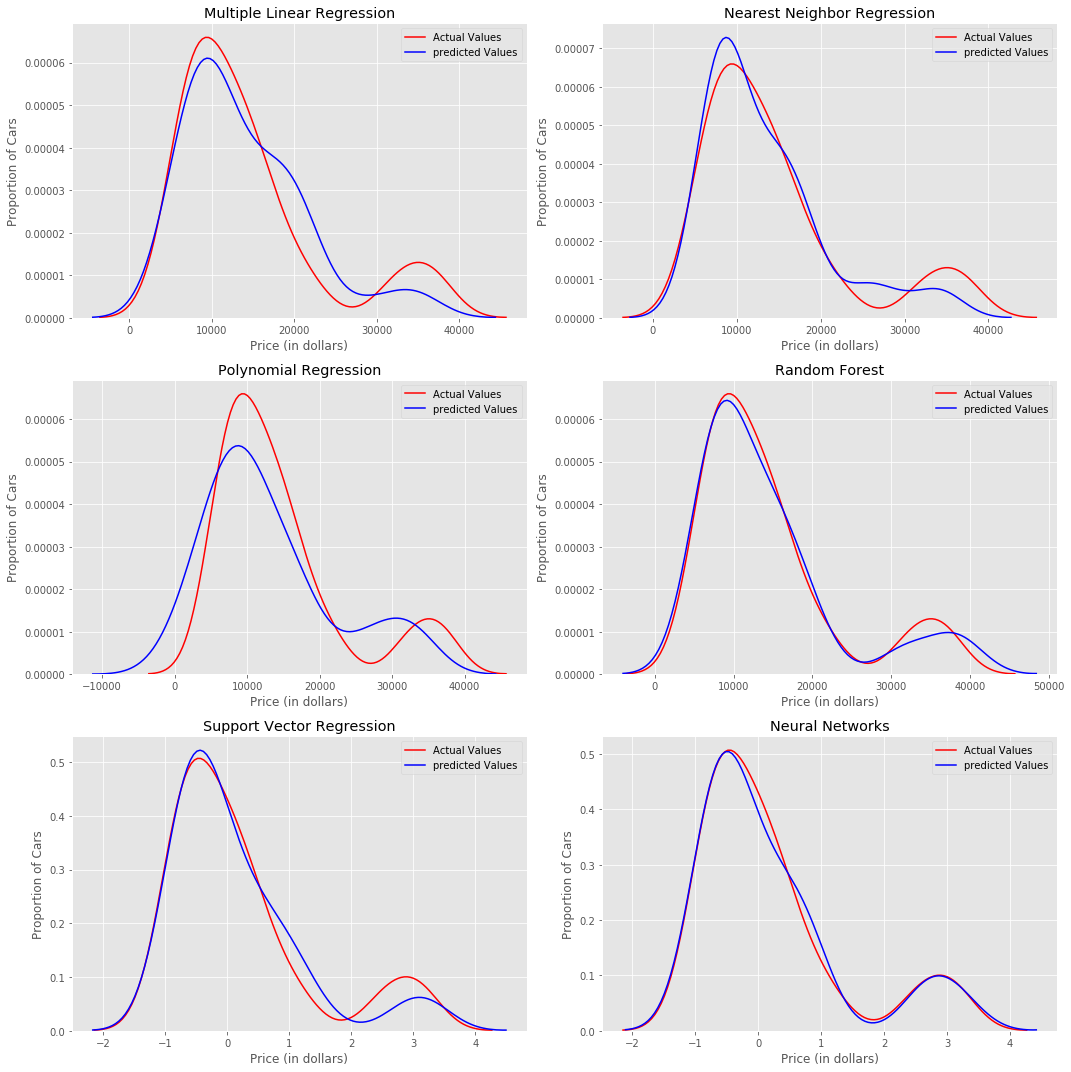

In [87]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(15,15))

title = "Multiple Linear Regression"
predicted = LR.predict(X_test)
plot_distribution(ax1, predicted, y_test, title)

title = "Nearest Neighbor Regression"
predicted = KNN.predict(X_test)
plot_distribution(ax2, predicted, y_test, title)

title = "Polynomial Regression"
predicted = pipe.predict(X_test)
plot_distribution(ax3, predicted, y_test, title)

title = "Random Forest"
predicted = RF.predict(X_test)
plot_distribution(ax4, predicted, y_test, title)

title = "Support Vector Regression"
predicted = svr.predict(X_test_scaled)
plot_distribution(ax5, predicted, y_test_scaled, title)

title = "Neural Networks"
predicted = nn.predict(X_test_scaled)
plot_distribution(ax6, predicted, y_test_scaled, title)

plt.tight_layout()
plt.show()

Clearly neural networks and random forest won the battle. to further improve the results both of them should be refined and merged in intelligent way.

Summarize R_square

In [88]:
R_Square = [LR.score(X_test, y_test),
            KNN.score(X_test, y_test),
            pipe.score(X_test, y_test),
            RF.score(X_test, y_test),
            svr.score(X_test_scaled, y_test_scaled),
            nn.score(X_test_scaled, y_test_scaled)]

In [89]:
df = {'Algorithm': ['Linear Regression','K-Nearest Neighbors','Polynomial Regression', 'Random Forest', 
                    'Support Vector Machines', 'Neural Networks'], \
      'R_Square': R_Square}
df_final = pd.DataFrame(data=df, columns=['Algorithm', 'R_Square'], index=None)
df_final

,Algorithm,R_Square
0,Linear Regression,0.752625
1,K-Nearest Neighbors,0.653345
2,Polynomial Regression,0.758018
3,Random Forest,0.919407
4,Support Vector Machines,0.796470
5,Neural Networks,0.916659


<a id="ref22"></a>
<h3><center>Model Refinement</center></h3> 
<center>(Neural Networks Parameter Tuning</center>

To refine any model, its hyper parameters tuning is done in grid search manner.

Creating Grid of hyperparameter values for neural network model

In [90]:
# Create the grid
grid = {"hidden_layer_sizes": [(128,64),(100,50),(256,128),], 
              "activation": ["relu","tanh", ], 
              "solver": ["lbfgs", "adam"], 
              "alpha": [0.0005,0.0001,]}

Giving grid of values as parameter along with random forest model instance and number of cross validations

In [91]:
nn_grid = GridSearchCV(estimator = nn, param_grid = grid, cv = 2, n_jobs = -1, verbose = 2)

Fitting neural network models for all hyper parameters combinations

In [92]:
nn_grid.fit(X_train_scaled,y_train_scaled.ravel())

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   16.9s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(128, 64),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=7000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...ne, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation'

Best performing neural network model

In [93]:
Bestnn = nn_grid.best_estimator_
Bestnn

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128, 64), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=7000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Best Performing neural network model performance

In [94]:
Bestnn_predictions = Bestnn.predict(X_test_scaled)
print("After Refinement, the R_square value is: ", Bestnn.score(X_test_scaled,y_test_scaled))

After Refinement, the R_square value is:  0.9224288404308043


<a id="ref23"></a>
<h1><center>Clustering</center></h1>

<a id="ref24"></a>
<h3><center>Classical Clustering</center></h3>
<center>(Customer Segmentation</center>

<a id="ref25"></a>
<h6><center>Data Preparation</center></h6>

In [95]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [96]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


scaling the dataset

In [97]:
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74,  0.31, -0.38, ..., -0.59, -0.52, -0.58],
       [ 1.49, -0.77,  2.57, ...,  1.51, -0.52,  0.39],
       [-0.25,  0.31,  0.21, ...,  0.8 ,  1.91,  1.6 ],
       ...,
       [-1.25,  2.47, -1.26, ...,  0.04,  1.91,  3.46],
       [-0.38, -0.77,  0.51, ..., -0.7 , -0.52, -1.08],
       [ 2.11, -0.77,  1.1 , ...,  0.16, -0.52, -0.23]])

define plotting functions for clusters visualizations

In [98]:
def plot3d_clusters(X,cluster_labels):
    fig = plt.figure(1, figsize=(12, 6))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    ax.set_xlabel('Education')
    ax.set_ylabel('Age')
    ax.set_zlabel('Income')

    ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= cluster_labels.astype(np.float))

In [99]:
def plotInteractive3d_scatter(X,cluster_labels):
    plot_scatter = go.Scatter3d(
        x=X[:, 1], 
        y=X[:, 0],
        z=X[:, 3],
        mode='markers',
        marker=dict(
            size=5,
            cmax=4,
            cmin=0,
            color=cluster_labels.astype(np.float), 
            colorbar=dict(title='matter'), 
            colorscale='matter'
        )
    )
    plotData = [plot_scatter]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )  
    fig = go.Figure(data=plotData, layout=layout)
    return fig

<a id="ref26"></a>
<h6><center>Clustering Methods</center></h6>

<a id="ref27"></a>
<h6><center>K-Means Clustering</center></h6>

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [100]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
df_new = df.copy()
df_new["Cluster"] = labels
df_new.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


We can easily check the centroid values by averaging the features in each cluster.

In [101]:
df_new.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


Now, lets look at the distribution of customers based on their age and income:

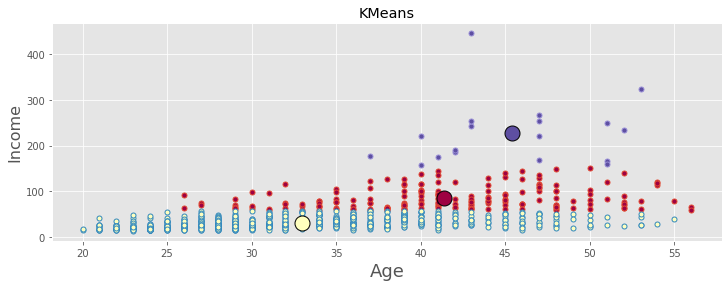

In [102]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, clusterNum))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
for k, col in zip(range(clusterNum), colors):

    my_members = (labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]
 
    ax.plot(X[my_members, 0], X[my_members, 3],'o',markerfacecolor=col, marker='.',markersize=10)
    
    ax.plot(cluster_center[0], cluster_center[3], 'bo', markerfacecolor=col,  markeredgecolor='k', markersize=15)

ax.set_title('KMeans')
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Income', fontsize=16)

# Show the plot
plt.show()

Now, lets look at the distribution of customers based on their age education and income:

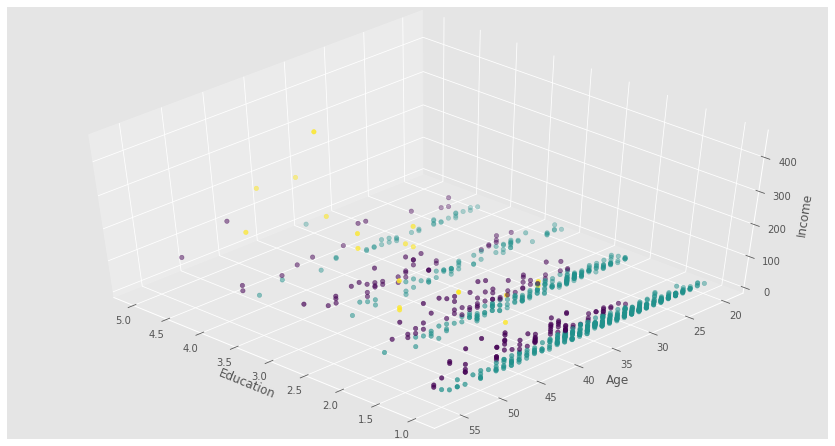

In [103]:
plot3d_clusters(X,labels)

Interactive 3d plot using plotly for age education and income

In [104]:
fig = plotInteractive3d_scatter(X,labels)

saving 3d plot

In [107]:
iplot(fig,filename='kmeans_clustering.html')

k-means will partition customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

<a id="ref28"></a>
<h6><center>Hierarchical Clustering</center></h6>

In k-means clustering we had to choose number of clusters before hand but in hierarchical clustering the optimum clusters are found using dendrogram. This is one of its great advantage.

Using the dendrogram to find the optimal number of clusters

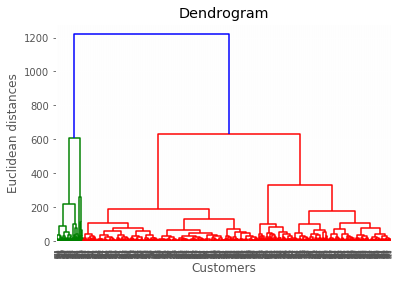

In [108]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [109]:
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit(X)
clusterNum = hc.n_clusters_
labels = hc.labels_
df_new = df.copy()
df_new["Cluster"] = labels
df_new.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.

In [110]:
df_new.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,426.691816,34.226343,1.670077,7.569054,38.051151,1.324832,2.622623,0.270062,10.274680
1,411.794118,44.264706,2.176471,20.029412,145.852941,4.474676,8.324500,0.153846,8.986765


In [111]:
cluster_centers = df_new.groupby('Cluster').mean()[['Age','Income']].values
cluster_centers

array([[ 34.23,  38.05],
       [ 44.26, 145.85]])

Now, lets look at the distribution of customers based on their age and income:

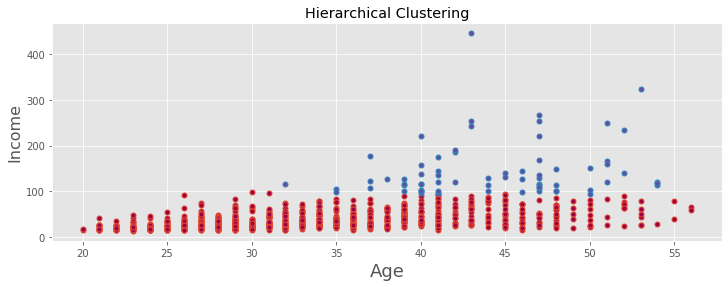

In [112]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, clusterNum))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
for k, col in zip(range(clusterNum), colors):
    
    my_members = (labels == k) 
    ax.plot(X[my_members, 0], X[my_members, 3],'o',markerfacecolor=col, marker='.',markersize=10)

ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Income', fontsize=16)

# Show the plot
plt.show()

Now, lets look at the distribution of customers based on their age education and income:

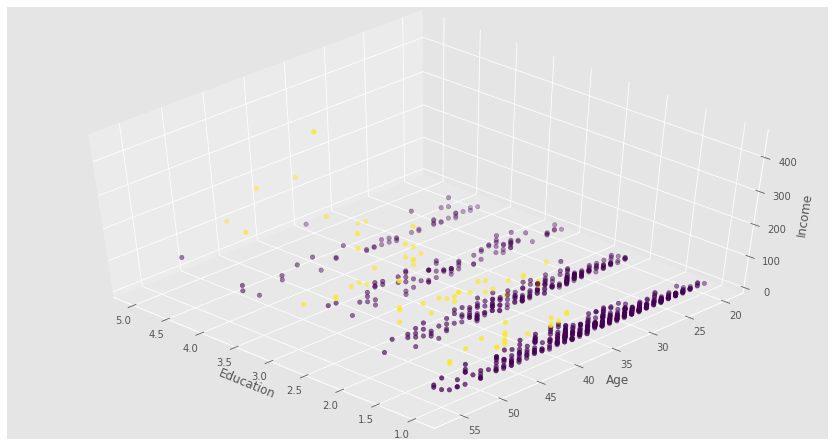

In [113]:
plot3d_clusters(X,labels)

Interactive 3d plot using plotly for age education and income

In [114]:
fig = plotInteractive3d_scatter(X,labels)

saving 3d plot

In [115]:
iplot(fig,filename='Hierarchical_clustering.html')

<a id="ref29"></a>
<h3><center>Density Based Clustering</center></h3>

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

DBSCAN is specially very good for tasks like class identification on a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. For example, this following example cluster the location of weather stations in Canada. DBSCAN can be used here, for instance, to find the group of stations which show the same weather condition. As you can see, it not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises

<a id="ref30"></a>
<h6><center>Data Preparation</center></h6>


Loading Data

In [116]:
filename='weather-stations20140101-20141231.csv'
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

Lets remove rows that don't have any value in the __Tm__ field.

In [117]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


Visualization of stations on map using basemap package. The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections. 

Please notice that the size of each data points represents the average of maximum temperature for each station in a year. 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



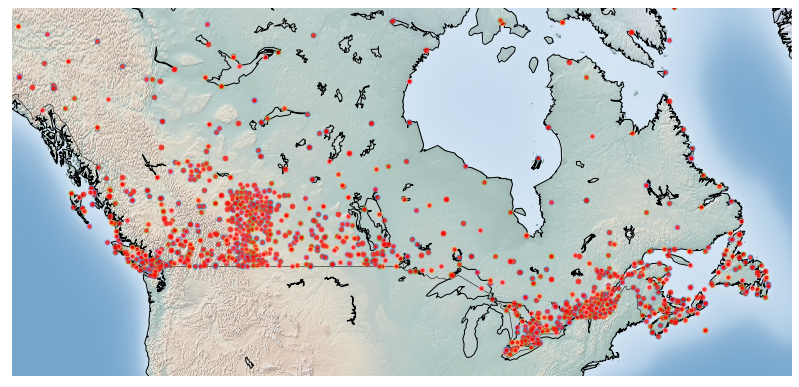

In [118]:
rcParams['figure.figsize'] = (14,10)

llon=-140 #lower longitude
ulon=-50 #upper longitude
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

<a id="ref31"></a>
<h6><center>DBSCAN</center></h6>

Let's do clustering of stations based on their location i.e. Lat & Lon

__DBSCAN__ form sklearn library can run DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 

In [119]:
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet[:5]

array([[-1.17, -0.33],
       [-1.19, -0.35],
       [-1.18, -0.35],
       [-1.17, -0.37],
       [-1.16, -0.44]])

Compute DBSCAN

In [120]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[:5]

array([ True,  True,  True,  True,  True])

A sample of clusters

In [121]:
labels = db.labels_
pdf["Clusters"]=labels
pdf[["Stn_Name","Tx","Tm","Clusters"]].head(5)

,Stn_Name,Tx,Tm,Clusters
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


As seen from following, in dbscan, for outliers the cluster label is -1

In [122]:
set(labels)

{-1, 0, 1, 2, 3, 4}

In [123]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
print(realClusterNum, clusterNum)

5 6


Now, we can visualize the clusters using basemap:

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Cluster 0, Avg Temp: -5.538747553816051
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


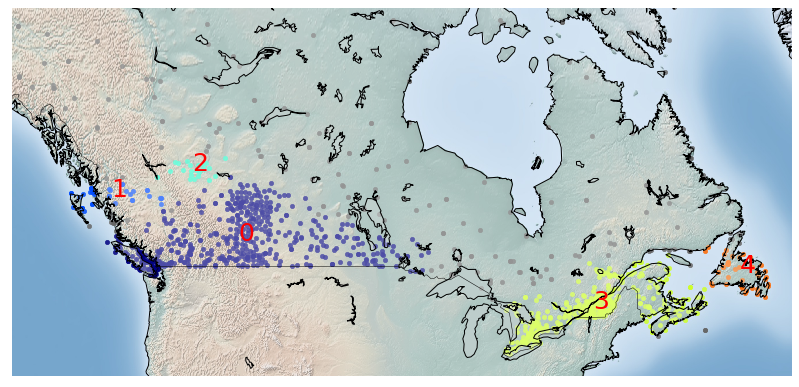

In [124]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clusters == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

Let's do Clustering of stations based on their location, mean, max, and min Temperature
In this section we re-run DBSCAN, but this time on a 5-dimensional dataset:

In [125]:
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clusters"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clusters"]].head(5)

,Stn_Name,Tx,Tm,Clusters
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Visualization of clusters based on location and Temperture


D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Cluster 0, Avg Temp: 6.2211920529801334
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882355
Cluster 3, Avg Temp: -13.877209302325586
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398482
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


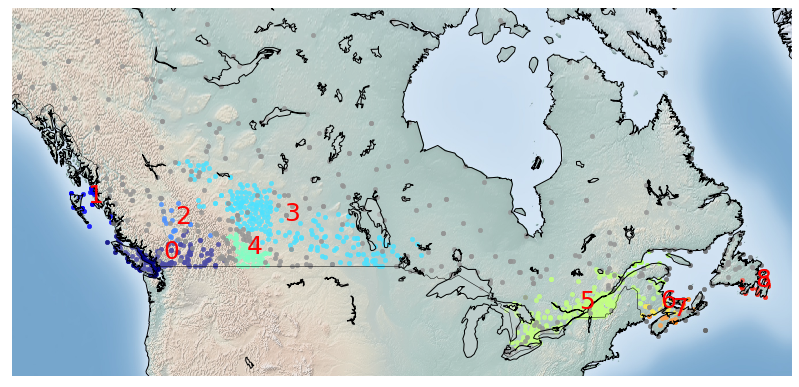

In [126]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clusters == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

<a id="ref32"></a>
<h1><center>Dimensionality Reduction</center></h1> 

<a id="ref33"></a>
<h3><center> Data Preparation</center></h3> 

Importing the dataset

In [127]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Different Customer Segments / different value for output

In [128]:
dataset["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [129]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

Splitting the dataset into the Training set and Test set

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [131]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Plotting functions for later evaluation purpose

In [132]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [133]:
col = []
for i in range(3):
    col.append(ListedColormap(('red', 'green', 'blue'))(i))
colors = np.array(col)

def plot_dimensions(X_set,y_set,dimension1_name,dimension2_name):

    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = colors[i,:].reshape(1,-1), label = j)

    plt.title('Logistic Regression')
    plt.xlabel(dimension1_name)
    plt.ylabel(dimension2_name)
    plt.legend()
    plt.show()

<a id="ref34"></a>
<h3><center>Dimensionality Reduction Methods</center></h3> 

<a id="ref35"></a>
<h6><center>Principle Component Analysis</center></h6> 

Applying PCA

In [134]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

Explained Variance by chosen two components/dimensions out of 13

In [135]:
explained_variance

array([0.37, 0.19])

So this shows that about 56% of variance is captured by our new 2 dimensions generated using 13 dimensions.

fitting logist regression model using only these two components instead of 13

In [136]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the Test set results

In [137]:
y_pred = classifier.predict(X_test_pca)

Making the Confusion Matrix

In [138]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

Plot non-normalized confusion matrix

Confusion matrix, without normalization
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


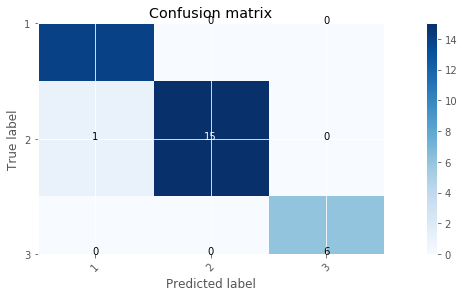

In [139]:
plt.figure(figsize=(12,4))
plot_confusion_matrix(cm, classes=[1,2,3],normalize= False,  title='Confusion matrix')

Visualising the Training set results

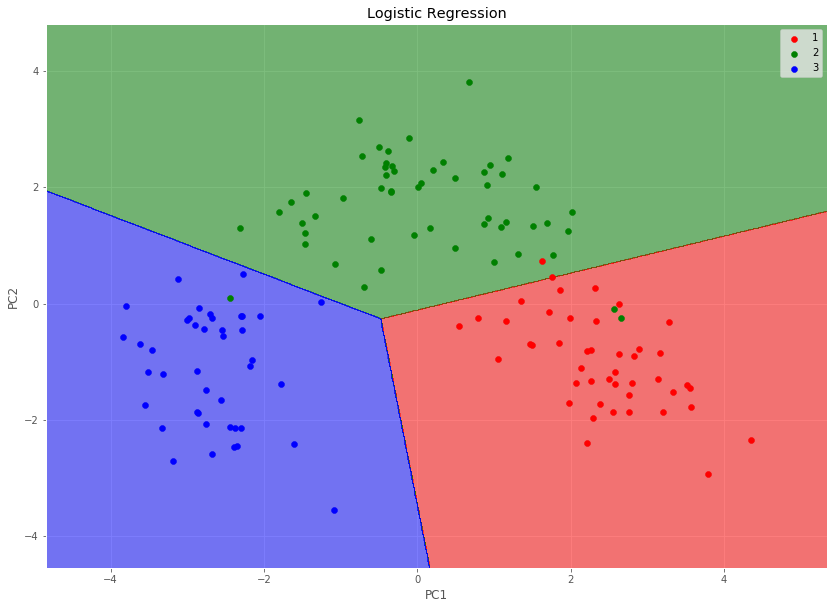

In [140]:
X_set, y_set = X_train_pca, y_train
plot_dimensions(X_train_pca,y_train,"PC1","PC2")

Visualising the Test set results

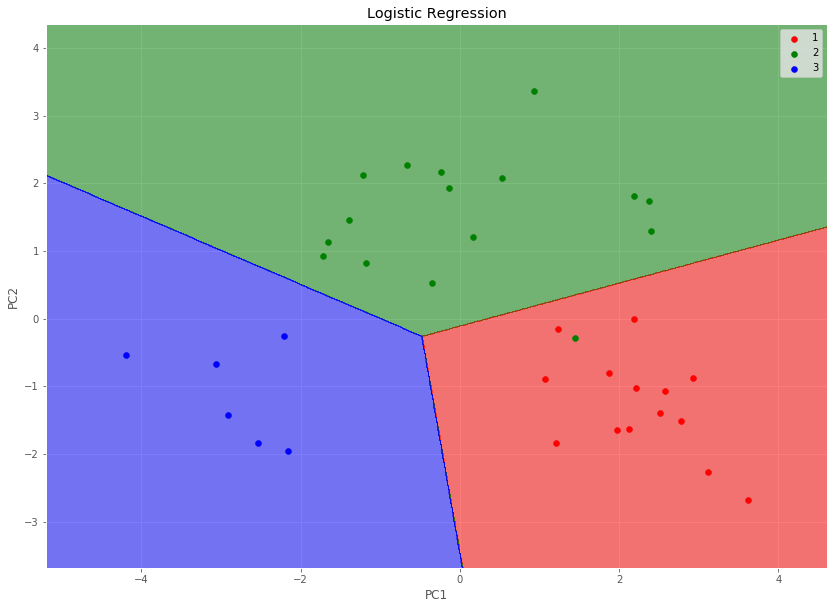

In [141]:
X_set, y_set = X_test_pca, y_test
plot_dimensions(X_set,y_set,"PC1","PC2")

<a id="ref36"></a>
<h6><center>Linear Discriminant Analysis</center></h6> 

Applying LDA

In [142]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_

Explained Variance by chosen two components/dimensions out of 13

In [143]:
explained_variance

array([0.74, 0.26])

So this shows that about 99% of variance is captured by our new 2 dimensions generated by LDA using 13 dimensions. That is quite interesting.

fitting logist regression model using only these two components instead of 13

In [144]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_lda, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the Test set results

In [145]:
y_pred = classifier.predict(X_test_lda)

Making the Confusion Matrix

In [146]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

Plot non-normalized confusion matrix

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


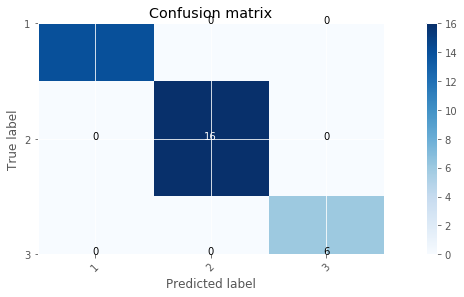

In [147]:
plt.figure(figsize=(12,4))
plot_confusion_matrix(cm, classes=[1,2,3],normalize= False,  title='Confusion matrix')

Visualising the Training set results

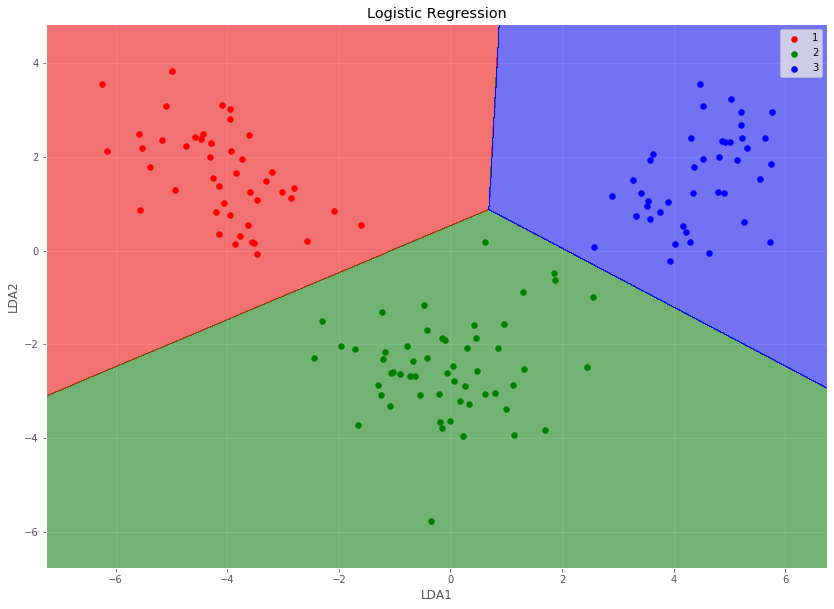

In [148]:
X_set, y_set = X_train_lda, y_train
plot_dimensions(X_train_lda,y_train,"LDA1","LDA2")

Visualising the Test set results

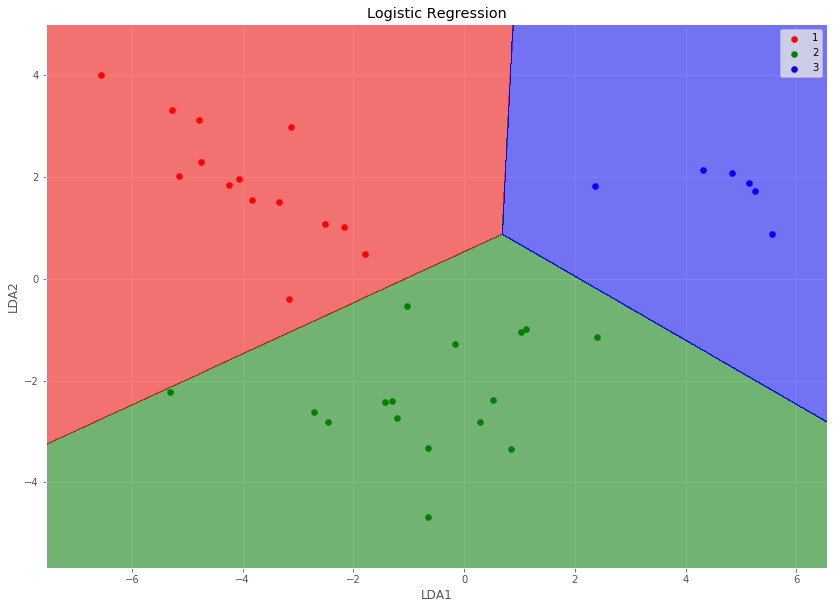

In [149]:
X_set, y_set = X_test_lda, y_test
plot_dimensions(X_set,y_set,"LDA1","LDA2")